<a href="https://colab.research.google.com/github/vinthegreat84/ML-Lab/blob/main/08_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

In [21]:
# load the data
link = 'https://raw.githubusercontent.com/vinthegreat84/ML-Lab/main/data/sand.csv'
data = pd.read_csv(link)
data.head()

,SAMPLE ID,SIO2,TIO2,AL2O3,MNO,MGO,CAO,NA2O,K2O,P2O5,class
0,ME4,81.10,0.710,7.50,0.080,1.10,0.72,0.86,1.890,0.030,Non-sand
1,"91-596-1.2,68-71",52.77,0.842,14.67,1.242,3.29,2.40,4.33,3.579,1.200,Non-sand
2,17-Mar,43.73,2.060,15.90,0.170,10.03,4.57,1.39,1.520,0.160,Non-sand
3,ME5,84.90,0.330,5.40,0.030,0.27,2.00,0.07,1.630,0.020,Non-sand
4,V14-55,65.91,0.614,11.08,0.152,2.42,4.03,3.41,1.140,0.082,Non-sand


In [22]:
# dropping extra variable
data.drop(['SAMPLE ID'], axis=1, inplace=True)
data.head()

,SIO2,TIO2,AL2O3,MNO,MGO,CAO,NA2O,K2O,P2O5,class
0,81.10,0.710,7.50,0.080,1.10,0.72,0.86,1.890,0.030,Non-sand
1,52.77,0.842,14.67,1.242,3.29,2.40,4.33,3.579,1.200,Non-sand
2,43.73,2.060,15.90,0.170,10.03,4.57,1.39,1.520,0.160,Non-sand
3,84.90,0.330,5.40,0.030,0.27,2.00,0.07,1.630,0.020,Non-sand
4,65.91,0.614,11.08,0.152,2.42,4.03,3.41,1.140,0.082,Non-sand


Accuracy:  0.7742402315484804
              precision    recall  f1-score   support

           0       0.77      0.63      0.69       279
           1       0.78      0.87      0.82       412

    accuracy                           0.77       691
   macro avg       0.77      0.75      0.76       691
weighted avg       0.77      0.77      0.77       691



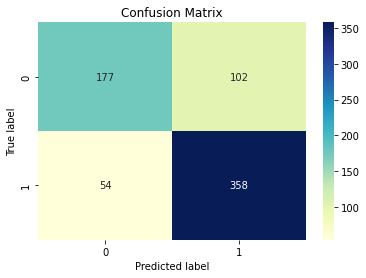

In [25]:
# Split data into features and target variable
X = data[['SIO2', 'TIO2', 'AL2O3', 'MNO', 'MGO', 'CAO', 'NA2O', 'K2O', 'P2O5']]
y = data['class']

# One Hot Encoding the target variable
y = pd.get_dummies(y)
y = y.iloc[:, 1]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
clf = LogisticRegression(max_iter=1000)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

# Generate a classification report
print(classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()